In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/soaicbe/ml/master/car_data/car.data',names=['buying','maint','doors','persons','lug_boot','safety','class'])
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.tail()

,buying,maint,doors,persons,lug_boot,safety,class
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [ ]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [ ]:
le.fit_transform(df['class'])

array([2, 2, 2, ..., 2, 1, 3])

In [ ]:
for i in df.columns:
  df[i+'_encode']=le.fit_transform(df[i])
df

,buying,maint,doors,persons,lug_boot,safety,class,buying_encode,maint_encode,doors_encode,persons_encode,lug_boot_encode,safety_encode,class_encode
0,vhigh,vhigh,2,2,small,low,unacc,3,3,0,0,2,1,2
1,vhigh,vhigh,2,2,small,med,unacc,3,3,0,0,2,2,2
2,vhigh,vhigh,2,2,small,high,unacc,3,3,0,0,2,0,2
3,vhigh,vhigh,2,2,med,low,unacc,3,3,0,0,1,1,2
4,vhigh,vhigh,2,2,med,med,unacc,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good,1,1,3,2,1,2,1
1724,low,low,5more,more,med,high,vgood,1,1,3,2,1,0,3
1725,low,low,5more,more,big,low,unacc,1,1,3,2,0,1,2
1726,low,low,5more,more,big,med,good,1,1,3,2,0,2,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(df[['buying_encode','maint_encode','doors_encode','persons_encode','lug_boot_encode','safety_encode']],df['class_encode'], test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
print(lr.score(X_test,Y_test))
print(lr.score(X_train,Y_train))


0.6820809248554913
0.6989247311827957


In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
print(dtc.score(X_test,Y_test))
print(dtc.score(X_train,Y_train))

0.9730250481695568
1.0


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
print(rfc.score(X_test, Y_test))
print(rfc.score(X_train, Y_train))

0.9807321772639692
1.0


In [ ]:
abc = AdaBoostClassifier()
abc.fit(X_train, Y_train)
print(abc.score(X_test,Y_test))
print(abc.score(X_train,Y_train))

0.7533718689788054
0.7725392886683209


In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
print(gbc.score(X_test,Y_test))
print(gbc.score(X_train,Y_train))

0.9845857418111753
0.9958643507030603


In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)
print(svc.score(X_test, Y_test))
print(svc.score(X_train,Y_train))

0.8998073217726397
0.9387923904052936


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)
print(knn.score(X_test, Y_test))
print(knn.score(X_train,Y_train))

0.8689788053949904
0.9379652605459057


In [ ]:
g = GaussianNB()
g.fit(X_train, Y_train)
print(g.score(X_train, Y_train))
print(g.score(X_test,Y_test))

0.62944582299421
0.603082851637765


**Visualization**

In [ ]:
Algorithm=['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier','SVC','KNeighborsClassifier','GaussianNB']
test=[70,97,96,81,96,90,86,64]
train=[68,100,100,76,99,94,92,60]


In [ ]:
Train_dict = {'Algorithm' : pd.Series(Algorithm), 'test':pd.Series(test),'train':pd.Series(train)}

In [ ]:
dframe = pd.DataFrame(Train_dict)

In [ ]:
dframe

,Algorithm,test,train
0,LogisticRegression,70,68
1,DecisionTreeClassifier,97,100
2,RandomForestClassifier,96,100
3,AdaBoostClassifier,81,76
4,GradientBoostingClassifier,96,99
5,SVC,90,94
6,KNeighborsClassifier,86,92
7,GaussianNB,64,60


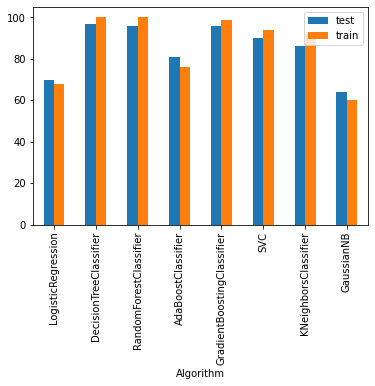

In [ ]:
dframe.plot.bar(x='Algorithm')